In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [10]:
plt.style.use('ggplot')

# Cargar los datos del archivo CSV en un DataFrame
df = pd.read_csv('/content/us_tornado_dataset_1950_2021.csv')


In [11]:
# Visualizar los primeros registros del DataFrame
df.head()

,yr,mo,dy,date,st,mag,inj,fat,slat,slon,elat,elon,len,wid
0,1950,1,3,1950-01-03,IL,3,3,0,39.10,-89.30,39.12,-89.23,3.6,130
1,1950,1,3,1950-01-03,MO,3,3,0,38.77,-90.22,38.83,-90.03,9.5,150
2,1950,1,3,1950-01-03,OH,1,1,0,40.88,-84.58,0.00,0.00,0.1,10
3,1950,1,13,1950-01-13,AR,3,1,1,34.40,-94.37,0.00,0.00,0.6,17
4,1950,1,25,1950-01-25,IL,2,0,0,41.17,-87.33,0.00,0.00,0.1,100


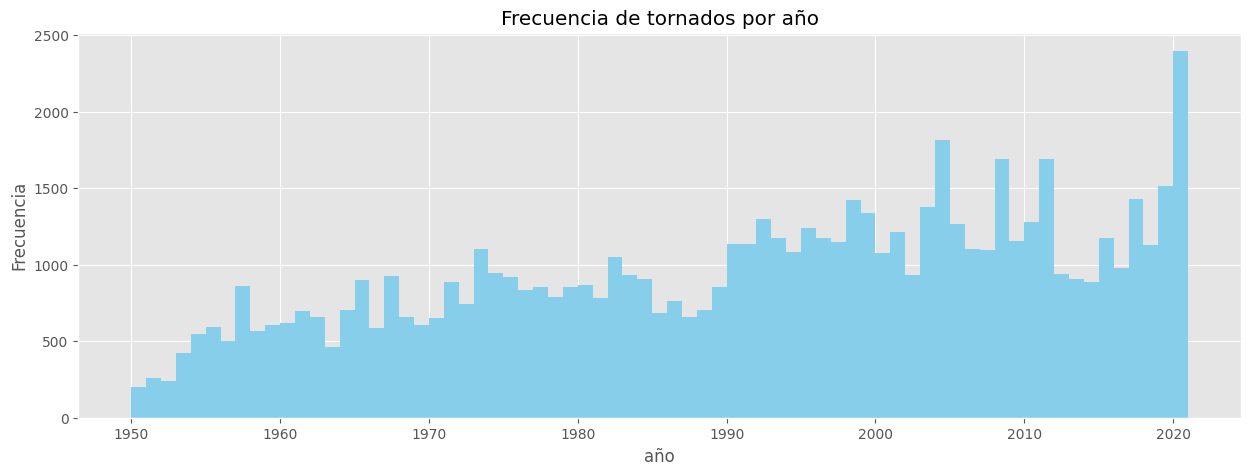

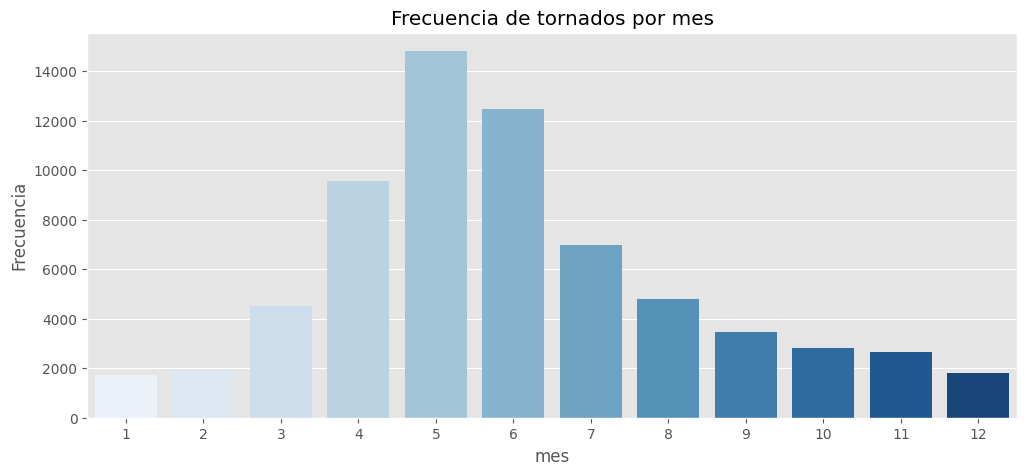

In [12]:
# Análisis temporal: Frecuencia de tornados por año y mes
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

plt.figure(figsize=(15, 5))
plt.title('Frecuencia de tornados por año')
plt.hist(df['year'], bins=range(df['year'].min(), df['year'].max()+1), color='skyblue')
plt.xlabel('año')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(12, 5))
plt.title('Frecuencia de tornados por mes')
sns.countplot(x='month', data=df, palette='Blues')
plt.xlabel('mes')
plt.ylabel('Frecuencia')
plt.show()



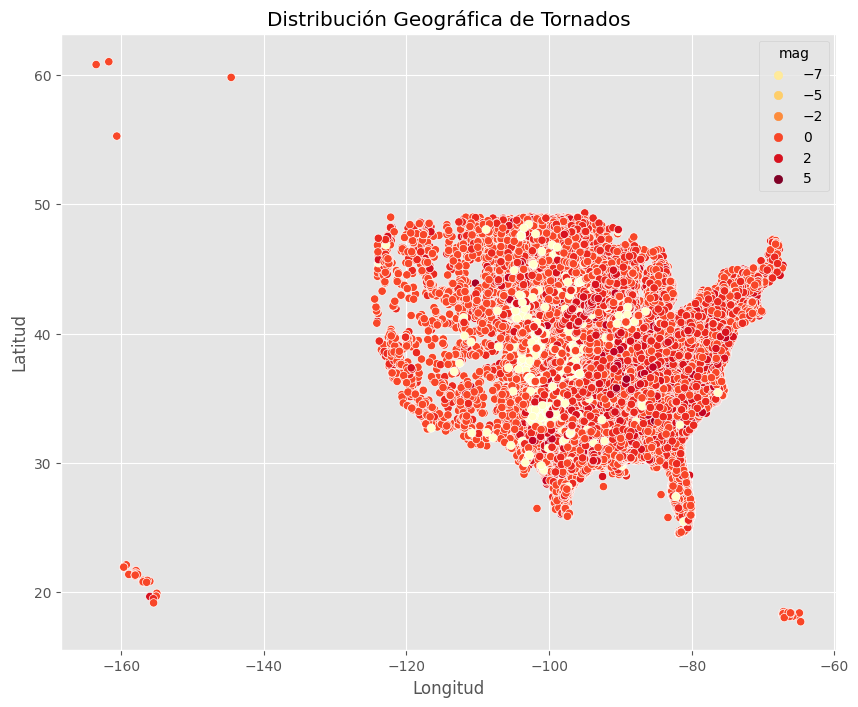

In [13]:
# Análisis geográfico: Mapa de calor de la distribución geográfica de tornados
plt.figure(figsize=(10, 8))
plt.title('Distribución Geográfica de Tornados')
sns.scatterplot(x='slon', y='slat', data=df, hue='mag', palette='YlOrRd')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

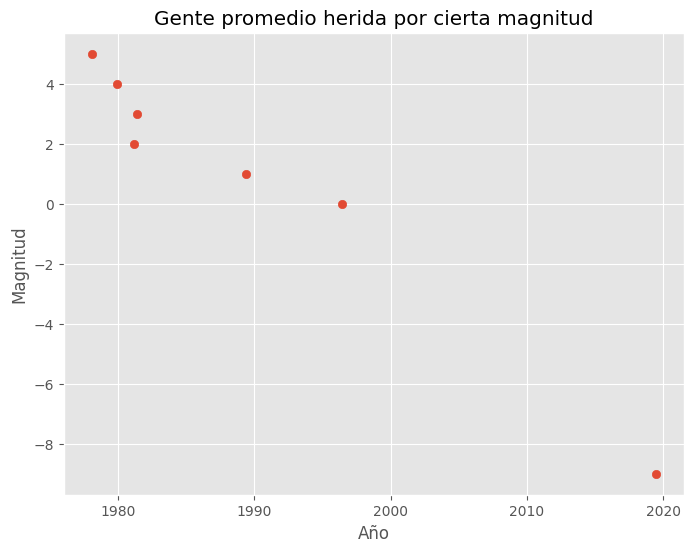

In [14]:
# Análisis de impacto: Relación entre la magnitud y el número promedio de heridos y fallecidos
df['hurt'] = df['inj'] + df['fat']

avg_hurt_mag = defaultdict()
total_mag_vals = dict(df['mag'].value_counts())

for i, mag in enumerate(df.iloc[:, 5]):
    try:
        avg_hurt_mag[mag] += df.iloc[i, 14]
    except:
        avg_hurt_mag[mag] = df.iloc[i, 14]

for key, val in avg_hurt_mag.items():
    avg_hurt_mag[key] = val / total_mag_vals[key]

plt.figure(figsize=(8, 6))
plt.scatter(avg_hurt_mag.values(), avg_hurt_mag.keys())
plt.title('Gente promedio herida por cierta magnitud')
plt.ylabel('Magnitud')
plt.xlabel('Año')
plt.show()

In [15]:
# Selección de características y variables objetivo
features = ['yr', 'mo', 'dy', 'len', 'wid', 'hurt']
target = 'mag'

X = df[features]
y = df[target]


In [16]:
# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
# Crear y entrenar el modelo de Random Forest de clasificacion.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
# Realizar predicciones en el conjunto de prueba
y_pred_prob = rf_model.predict_proba(X_test)  # Probabilidades de las predicciones


In [19]:
# Crear un DataFrame con las probabilidades de las predicciones
test_predictions = pd.DataFrame(y_pred_prob, columns=rf_model.classes_)


In [20]:
# Combinar el conjunto de prueba y las probabilidades de las predicciones en un solo DataFrame
test_data_with_predictions = pd.concat([X_test, test_predictions], axis=1)


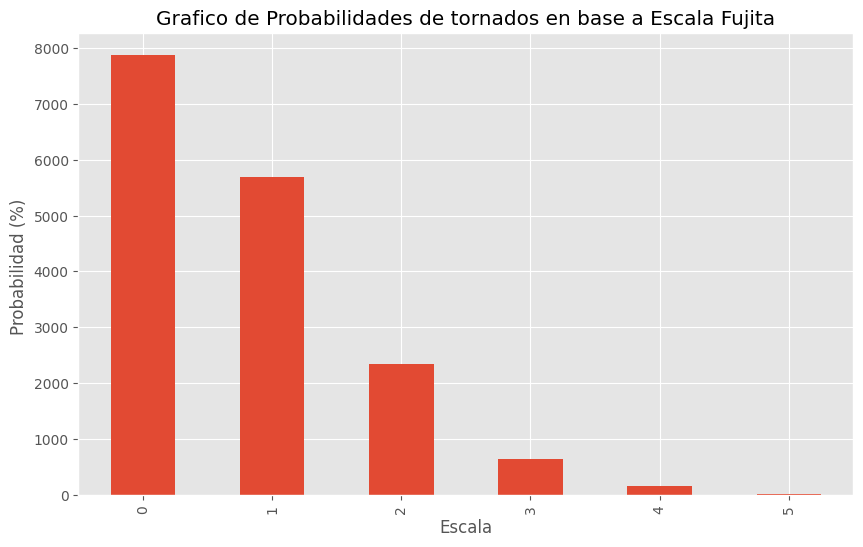

In [21]:
# Mostrar las probabilidades en un gráfico de barras
plt.figure(figsize=(10, 6))
test_data_with_predictions.iloc[:, -6:].sum().plot(kind='bar')  # Mostrar las probabilidades de las últimas 6 clases
plt.title('Grafico de Probabilidades de tornados en base a Escala Fujita')
plt.xlabel('Escala')
plt.ylabel('Probabilidad (%) ')
plt.show()

In [26]:
# Calcular la precisión del modelo
y_pred = rf_model.predict(X_test)  # Clases de predicción
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.635109532267614
